In [1]:
from PIL import Image
import pandas as pd
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow import keras

In [38]:
ourGenre = 'Action'

In [39]:
data = pd.read_csv(f"../GenresCSV/{ourGenre}.csv")
data

,Unnamed: 0,imdbID,Genre
0,0,tt0080684,1
1,1,tt0080377,1
2,2,tt0080549,0
3,3,tt0080549,0
4,4,tt0080549,0
...,...,...,...
2659,2659,tt4382872,1
2660,2660,tt3675748,1
2661,2661,tt3544326,1
2662,2662,tt1731701,1


In [40]:
genre = []
poster = []

In [41]:
for i in range(len(data)):
    tempImage = Image.open(f"../Posters100x100/{data['imdbID'][i]}.jpg")
    poster.append(np.array(tempImage))
    genre.append(data['Genre'][i])

In [42]:
print(len(genre))
print(len(poster))
print(len(poster[0]))
print(len(poster[0][0]))
print(len(poster[0][0][0]))

2664
2664
100
100
3


In [43]:
GenreStrings = [f"Not {ourGenre}", f"{ourGenre}"]

In [44]:
for i in range(len(poster) -1, -1 ,-1):
    if poster[i].shape != (100,100,3): 
        #some posters didnt have 100,100,3 so we deleted them
        genre.pop(i)
        poster.pop(i)
        
print(len(genre))

2664


In [54]:
X_train, X_test, y_train, y_test = train_test_split(poster, genre, test_size=0.1)

In [55]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

2397
2397
267
267


In [56]:
X_train = np.array(X_train) #turn them into numpy arrays
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [57]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (2397, 100, 100, 3)
2397 train samples
267 test samples


In [58]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
print (y_train.shape)
print(y_test.shape)
print (y_train)
print (y_train[0])

(2397, 2)
(267, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[0. 1.]


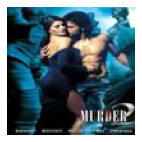

[0. 1.]
Action


In [59]:
index = 50
plt.figure(figsize=(20, 4))
# original
plt.subplot(2, 10, 1)
# plt.figure(figsize = (15,2))
plt.imshow(X_train[index].reshape(100, 100,3))
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.show()
print(y_train[index])
print(GenreStrings[np.argmax(y_train[index])])

In [60]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(len(GenreStrings), activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 20000)             0         
                                                                 
 dropout_2 (Dropout)         (None, 20000)            

In [61]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=["accuracy"])

In [62]:
model.fit(X_train, y_train, epochs =5, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/5
15/15 [==============================] - 12s 770ms/step - loss: 0.7861 - accuracy: 0.5378 - val_loss: 0.6860 - val_accuracy: 0.5271
Epoch 2/5
15/15 [==============================] - 12s 778ms/step - loss: 0.6595 - accuracy: 0.6051 - val_loss: 0.6277 - val_accuracy: 0.6375
Epoch 3/5
15/15 [==============================] - 12s 788ms/step - loss: 0.6222 - accuracy: 0.6500 - val_loss: 0.6161 - val_accuracy: 0.6458
Epoch 4/5
15/15 [==============================] - 12s 769ms/step - loss: 0.5923 - accuracy: 0.6818 - val_loss: 0.6196 - val_accuracy: 0.6646
Epoch 5/5
15/15 [==============================] - 11s 766ms/step - loss: 0.5557 - accuracy: 0.7178 - val_loss: 0.6100 - val_accuracy: 0.6667


In [63]:
model.fit(X_train, y_train, epochs =3, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/3
15/15 [==============================] - 12s 780ms/step - loss: 0.5046 - accuracy: 0.7543 - val_loss: 0.6161 - val_accuracy: 0.6562
Epoch 2/3
15/15 [==============================] - 12s 783ms/step - loss: 0.4688 - accuracy: 0.7741 - val_loss: 0.5679 - val_accuracy: 0.6917
Epoch 3/3
15/15 [==============================] - 12s 801ms/step - loss: 0.4111 - accuracy: 0.8185 - val_loss: 0.5552 - val_accuracy: 0.7292


(267, 2)


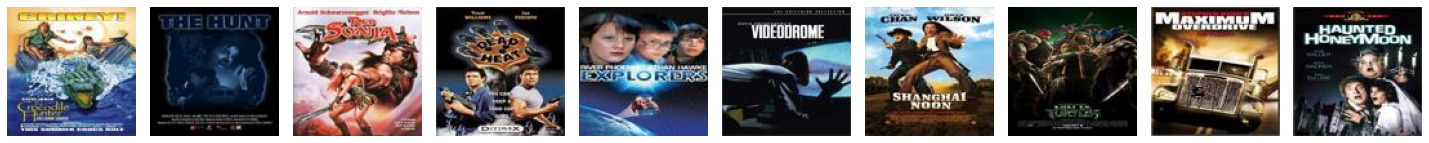

[0.5318512  0.46814883]
0
Genre is Action Predicted is Not Action ([0.5318512  0.46814883])
Genre is Action Predicted is Action ([0.13750459 0.8624954 ])
Genre is Action Predicted is Action ([0.14089435 0.85910565])
Genre is Action Predicted is Not Action ([0.5335429  0.46645713])
Genre is Not Action Predicted is Action ([0.45460618 0.5453938 ])
Genre is Not Action Predicted is Action ([0.20330815 0.7966919 ])
Genre is Action Predicted is Action ([0.36011302 0.639887  ])
Genre is Action Predicted is Action ([0.2816902  0.71830976])
Genre is Action Predicted is Action ([0.05271827 0.9472817 ])
Genre is Not Action Predicted is Not Action ([0.68106747 0.3189325 ])


In [64]:
# Compare original images with Predicted ones
decoded_imgs1 = model.predict(X_test)
offset = 0
decoded_imgs1= decoded_imgs1[offset:]
print(decoded_imgs1.shape)
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    # plt.figure(figsize = (15,2))
    plt.imshow(X_test[i+offset].reshape(100, 100,3))
    plt.gray()
    plt.axis('off')
plt.tight_layout()
plt.show()
print(decoded_imgs1[0])
print(np.argmax(decoded_imgs1[0]))
for i in range(10):
  print(f"Genre is {GenreStrings[np.argmax(y_test[i+offset])]} Predicted is {GenreStrings[np.argmax(decoded_imgs1[i])]} ({decoded_imgs1[i+offset]})")

In [65]:
#Evaluate the trained model
#Should have test and train genres equal
score = model.evaluate(X_test, y_test)
print("Test Loss: {:.2f}%".format(score[0]*100))
print("Test Accuracy:  {:.2f}%".format(score[1]*100))

9/9 [==============================] - 0s 35ms/step - loss: 0.5439 - accuracy: 0.7228
Test Loss: 54.39%
Test Accuracy:  72.28%


In [66]:
checkpoint_path = f"../Weights/{GenreStrings[1]}/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [67]:
model.save_weights(checkpoint_path)

In [68]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'../Weights/Action\\cp.ckpt'

In [69]:
# Loads the weights
model.load_weights(checkpoint_path)

In [70]:
# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

9/9 - 0s - loss: 0.5439 - accuracy: 0.7228 - 320ms/epoch - 36ms/step
Restored model, accuracy: 72.28%
